In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [375]:
#Original Csv
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\5_Pandas\Plotting\Plotting File Class Wise\Retail_sale.csv")

In [376]:
#clean Csv
df1=pd.read_csv(r"C:\Users\LENOVO\Downloads\5_Pandas\Plotting\Plotting File Class Wise\RetailSales_Pandas_Clean_File.csv")

In [377]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29995,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0
29996,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0
29997,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0
29998,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0


# 1.	What are the data types of each column in the dataset?

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [379]:
print(df.dtypes)

YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM CODE            object
ITEM DESCRIPTION     object
ITEM TYPE            object
RETAIL SALES        float64
RETAIL TRANSFERS    float64
WAREHOUSE SALES     float64
dtype: object


# 2.	Are there any missing values in the dataset? How can you handle them?

In [380]:
df.isnull().sum()

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

In [381]:
df["SUPPLIER"].value_counts()

SUPPLIER
THE COUNTRY VINTNER, LLC DBA WINEBOW    2041
REPUBLIC NATIONAL DISTRIBUTING CO       1832
SOUTHERN GLAZERS WINE AND SPIRITS       1304
LEGENDS LTD                             1227
MONSIEUR TOUTON SELECTION               1131
                                        ... 
LOOK VODKA LLC                             1
SANGLIER SELECTIONS LLC                    1
SCOPERTA IMPORTING COMPANY INC             1
Z WINE GALLERY IMPORTS LLC                 1
SMITH-ANDERSON ENTERPRISES INC             1
Name: count, Length: 290, dtype: int64

In [382]:
df["SUPPLIER"].mode()[0]   #select first value using [0]index.

'THE COUNTRY VINTNER, LLC DBA WINEBOW'

In [383]:
df["SUPPLIER"].fillna(df["SUPPLIER"].mode()[0],inplace=True)

In [384]:
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        1
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [385]:
df["RETAIL SALES"]

0          0.00
1          0.00
2          0.00
3          0.00
4          0.82
          ...  
29995      0.33
29996      0.00
29997      0.00
29998    329.04
29999      0.00
Name: RETAIL SALES, Length: 30000, dtype: float64

In [386]:
df["RETAIL SALES"].mean()

6.939795993199774

In [387]:
df["RETAIL SALES"].fillna(df["RETAIL SALES"].mean(),inplace=True)

In [388]:
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [389]:
df["ITEM CODE"]=df["ITEM CODE"].replace("WC",99999)

In [390]:
df["ITEM CODE"]=df["ITEM CODE"].replace("BC",88888)

# 3.	What is the distribution of sales revenue across different products?

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


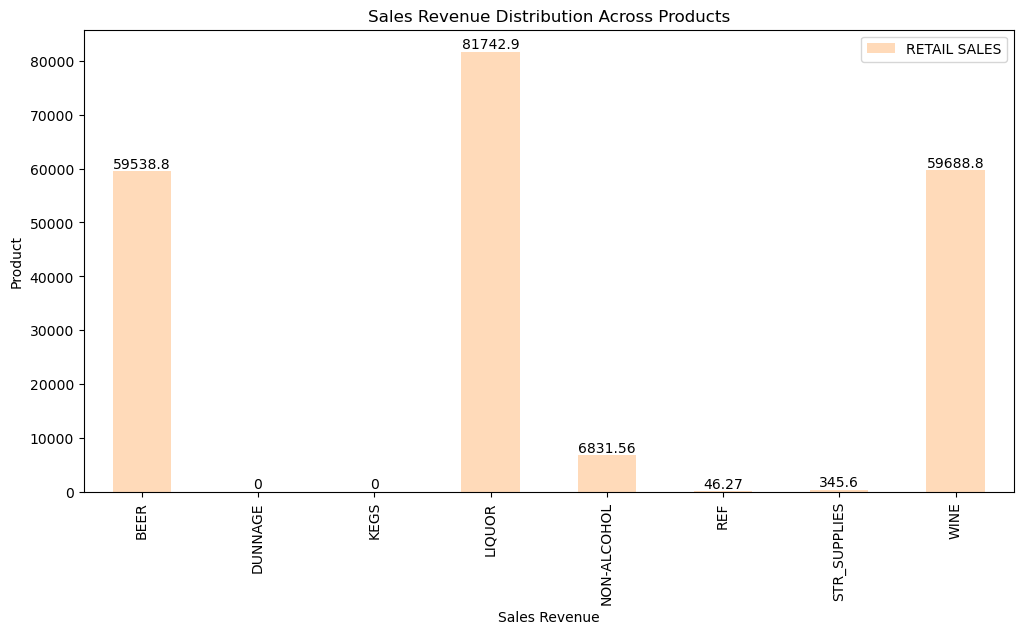

In [392]:
#Pandas
plt.figure(figsize=(12, 6))

ax = df.groupby("ITEM TYPE")["RETAIL SALES"].sum().plot(kind="bar",color='#FFDAB9')

plt.title('Sales Revenue Distribution Across Products')
plt.xlabel('Sales Revenue')
plt.ylabel('Product')

for i in ax.containers:
    ax.bar_label(i)

plt.legend()    


plt.show()

**ax.bar_label(i): Automatically adds labels to the bars in the chart, no need for manual annotation or positioning.**
    
**ax.containers: This stores all the bar containers (which holds the data for the bars).**        

In [393]:
RevenueDF = df.groupby("ITEM TYPE")["RETAIL SALES"].sum()

In [394]:
x = RevenueDF.index.values

In [395]:
x

array(['BEER', 'DUNNAGE', 'KEGS', 'LIQUOR', 'NON-ALCOHOL', 'REF',
       'STR_SUPPLIES', 'WINE'], dtype=object)

In [396]:
y = RevenueDF.values

In [397]:
y

array([5.9538760e+04, 0.0000000e+00, 0.0000000e+00, 8.1742850e+04,
       6.8315598e+03, 4.6270000e+01, 3.4560000e+02, 5.9688840e+04])

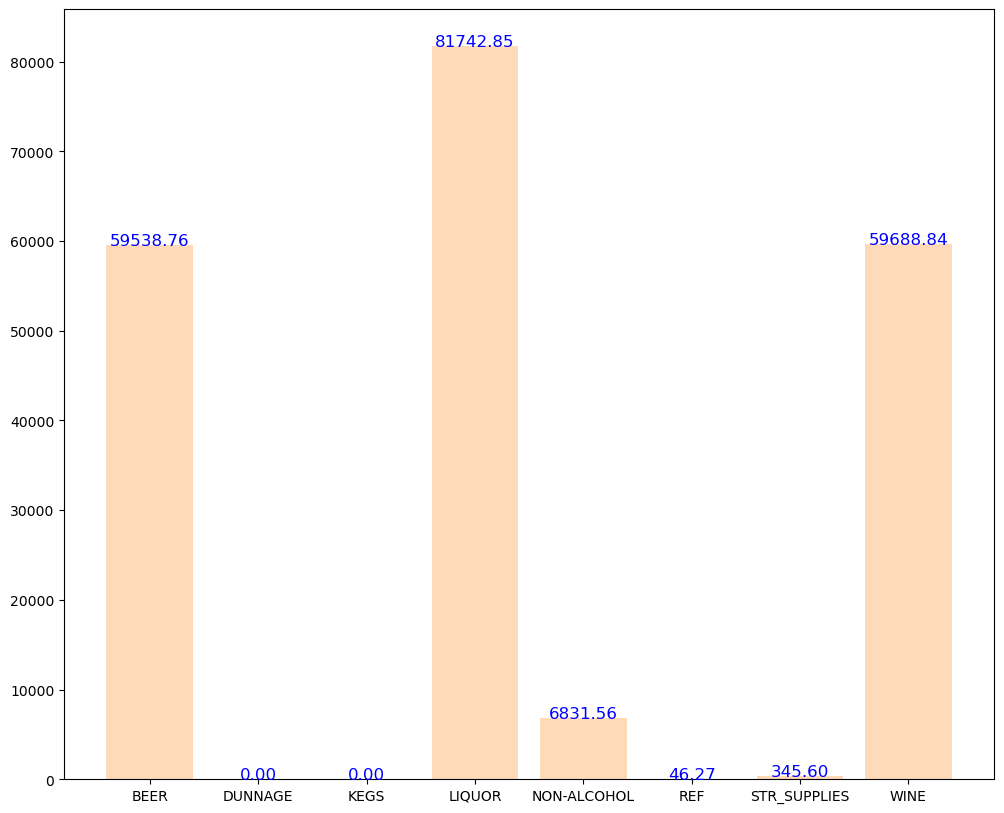

In [398]:
#Matplotlib
plt.figure(figsize=(12, 10))
plt.bar(x,y,color='#FFDAB9')

for i, value in enumerate(y):
    plt.text(i, value +2, f'{value:.2f}', ha='center', fontsize=12, color='blue')
    


plt.show()    

# 4.What percentage of total records contain missing data?

In [399]:
df.shape

(30000, 9)

In [400]:
total_value=df.size
total_value

270000

In [401]:
Uncleandata=pd.read_csv(r"C:\Users\LENOVO\Downloads\5_Pandas\Plotting\Plotting File Class Wise\Retail_sale.csv")

In [402]:
y=Uncleandata.isnull().sum()
y

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

In [403]:
null_value=y.values.sum()
null_value

34

In [404]:
missing_percent=null_value/total_value*100
missing_percent

0.012592592592592593

In [405]:
270000-34

269966

In [406]:
list1=[34,269966]

In [407]:
list2=["null_value","valid_value"]

([<matplotlib.patches.Wedge at 0x13b87a70d90>,
 [Text(1.0999999139218823, 0.0004351687620322173, 'null_value'),
  Text(-1.0999999139474248, -0.0004351041924902212, 'valid_value')],
 [Text(0.5999999530482995, 0.00023736477929030034, '0.01%'),
  Text(-0.5999999530622316, -0.00023732955954012063, '99.99%')])

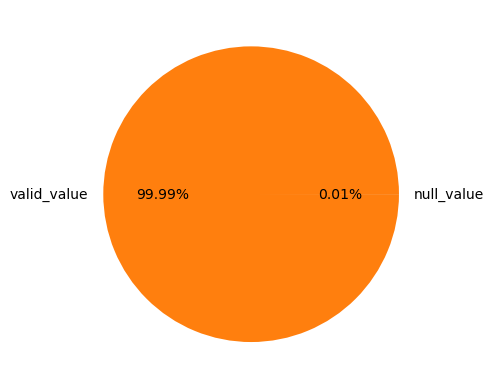

In [408]:

plt.pie(list1,labels=list2,autopct="%1.2f%%")

# 5.Are there any outliers in the sales or marketing spend columns? How do you detect them?


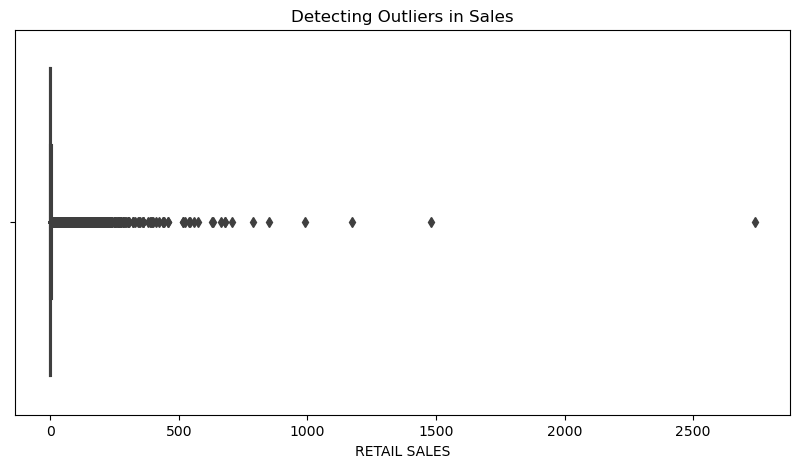

In [409]:
# Boxplot to detect outliers in 'RETAIL SALES'
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['RETAIL SALES'])
plt.title('Detecting Outliers in Sales')

plt.show()

# 6.How can you deal with outliers in the dataset?


In [410]:
# Removing outliers using IQR
Q1 = df['RETAIL SALES'].quantile(0.25)
Q3 = df['RETAIL SALES'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df['RETAIL SALES'] < (Q1 - 1.5 * IQR)) | (df['RETAIL SALES'] > (Q3 + 1.5 * IQR)))]
df_cleaned

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29994,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352320,CINCO SENTIDOS PAPALOMETL MEZCAL - 750ML,LIQUOR,0.00,0.0,1.0
29995,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0
29996,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0
29997,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0


# 7.What are the unique values for categorical columns like 'Product Category' and 'Store Location'?


In [411]:
df["ITEM TYPE"].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE',
       'NON-ALCOHOL'], dtype=object)

In [412]:
df["SUPPLIER"].unique()

array(['REPUBLIC NATIONAL DISTRIBUTING CO', 'PWSWN INC',
       'RELIABLE CHURCHILL LLLP', 'LANTERNA DISTRIBUTORS INC',
       'DIONYSOS IMPORTS INC', 'KYSELA PERE ET FILS LTD',
       'SANTA MARGHERITA USA INC', 'BROWN-FORMAN BEVERAGES WORLDWIDE',
       'JIM BEAM BRANDS CO', 'INTERNATIONAL CELLARS LLC',
       'HEAVEN HILL DISTILLERIES INC', 'BACCHUS IMPORTERS LTD',
       'MONSIEUR TOUTON SELECTION',
       'THE COUNTRY VINTNER, LLC DBA WINEBOW', 'ROYAL WINE CORP',
       'STE MICHELLE WINE ESTATES', 'Default', 'SAZERAC CO',
       'SALVETO IMPORTS LLC', 'HUB WINE CORPORATION',
       'ALLAGASH BREWING COMPANY', 'CAMPARI AMERICA LLC',
       'PERNOD RICARD USA LLC', 'PRESTIGE BEVERAGE GROUP OF MD LLC',
       'BACARDI USA INC', 'YOUNG WON TRADING INC',
       'TROEGS BREWING COMPANY', 'CASTLE BRANDS USA CORP', 'LEGENDS LTD',
       'WASHBURN WINE CO', 'CELICAR LLC DBA TWIN VALLEY DISTILLERS',
       'DOPS INC', 'JACKSON FAMILY ENTERPRISES INC',
       'BUCK DISTRIBUTING COMPANY INC'

# 8.Is there any duplicated data in the dataset?


In [413]:
duplicate=df[df.duplicated()]
duplicate

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES


In [414]:
duplicate.size

0

# 9.What is the range of dates in the dataset, and how many records belong to each year?


In [415]:
records_per_year = df.groupby(df["YEAR"]).size()
records_per_year

YEAR
2020    30000
dtype: int64

In [416]:
df["YEAR"].unique()

array([2020], dtype=int64)

# 10.How can you standardize or normalize numerical columns such as sales revenue and units sold?


Normalization is a technique used to scale data(Converting to one range to another) to a common range, 
typically between 0 and 1. 

two types of normlization 
1.standarzation(z-score Normalization):(df - df.mean()) / df.std()
2.Min-Max Normalization:(df - df.min()) / (df.max() - df.min())
    
df_standardized = (df["RETAIL SALES"]-df["RETAIL SALES"].mean())/df["RETAIL SALES"].std()

df_normalized = (df["RETAIL SALES"]-df["RETAIL SALES"].min())/(df["RETAIL SALES"].max()-df["RETAIL SALES"].min())

In [417]:
df_standardized = (df["RETAIL SALES"]-df["RETAIL SALES"].mean())/df["RETAIL SALES"].std()

df_normalized = (df["RETAIL SALES"]-df["RETAIL SALES"].min())/(df["RETAIL SALES"].max()-df["RETAIL SALES"].min())

In [418]:
print(df_standardized)

0       -0.209785
1       -0.209785
2       -0.209785
3       -0.209785
4       -0.184997
           ...   
29995   -0.199809
29996   -0.209785
29997   -0.209785
29998    9.736859
29999   -0.209785
Name: RETAIL SALES, Length: 30000, dtype: float64


In [419]:
print(df_normalized)

0        0.000153
1        0.000153
2        0.000153
3        0.000153
4        0.000453
           ...   
29995    0.000274
29996    0.000153
29997    0.000153
29998    0.120266
29999    0.000153
Name: RETAIL SALES, Length: 30000, dtype: float64


# Exploratory Data Analysis (EDA):


# 11.What are the top 10 products by total sales revenue?


In [420]:
x= df.groupby("ITEM TYPE")["RETAIL SALES"].sum()
x

ITEM TYPE
BEER            59538.760000
DUNNAGE             0.000000
KEGS                0.000000
LIQUOR          81742.850000
NON-ALCOHOL      6831.559796
REF                46.270000
STR_SUPPLIES      345.600000
WINE            59688.840000
Name: RETAIL SALES, dtype: float64

In [421]:
y=x.sort_values(ascending=False).head(10)   
y

ITEM TYPE
LIQUOR          81742.850000
WINE            59688.840000
BEER            59538.760000
NON-ALCOHOL      6831.559796
STR_SUPPLIES      345.600000
REF                46.270000
DUNNAGE             0.000000
KEGS                0.000000
Name: RETAIL SALES, dtype: float64

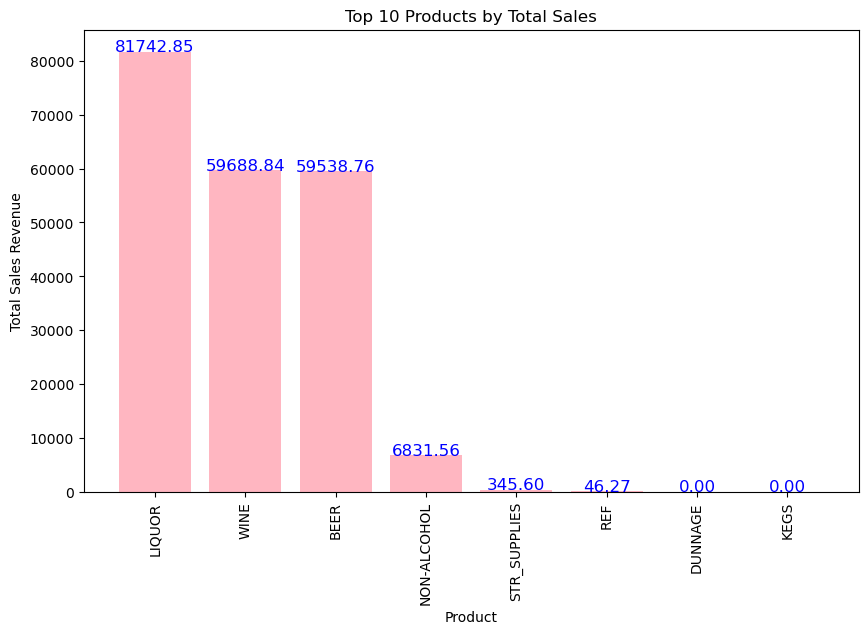

In [422]:
#Matplotlib
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.bar(y.index.values,y.values,color='#FFB6C1')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales Revenue')

for i, value in enumerate(y.values):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=12, color='blue')



plt.show()

In [423]:
#Alternative answer
top_10_products=df.groupby("ITEM TYPE")["RETAIL SALES"].sum().nlargest(10)
top_10_products

ITEM TYPE
LIQUOR          81742.850000
WINE            59688.840000
BEER            59538.760000
NON-ALCOHOL      6831.559796
STR_SUPPLIES      345.600000
REF                46.270000
DUNNAGE             0.000000
KEGS                0.000000
Name: RETAIL SALES, dtype: float64

# 12.Which stores have the highest average sales revenue?


In [424]:
x=df.groupby("SUPPLIER")["RETAIL SALES"].mean()
x

SUPPLIER
A I G WINE & SPIRITS           0.000000
ADAMBA IMPORTS INTL            3.035000
AIKO IMPORTERS INC             0.040000
ALLAGASH BREWING COMPANY       1.503659
ALLIED IMPORTERS USA LTD       0.000000
                                ...    
WINERY EXCHANGE INC            0.020000
YOUNG WON TRADING INC          2.158809
YUENGLING BREWERY             53.619412
Z WINE GALLERY IMPORTS LLC     0.980000
ZURENA LLC                     1.500000
Name: RETAIL SALES, Length: 290, dtype: float64

In [425]:
y=x.nlargest(5)
y

SUPPLIER
FIFTH GENERATION INC       256.959333
CROWN IMPORTS               69.198519
YUENGLING BREWERY           53.619412
HEINEKEN USA                45.730081
MARK ANTHONY BRANDS INC     30.662500
Name: RETAIL SALES, dtype: float64

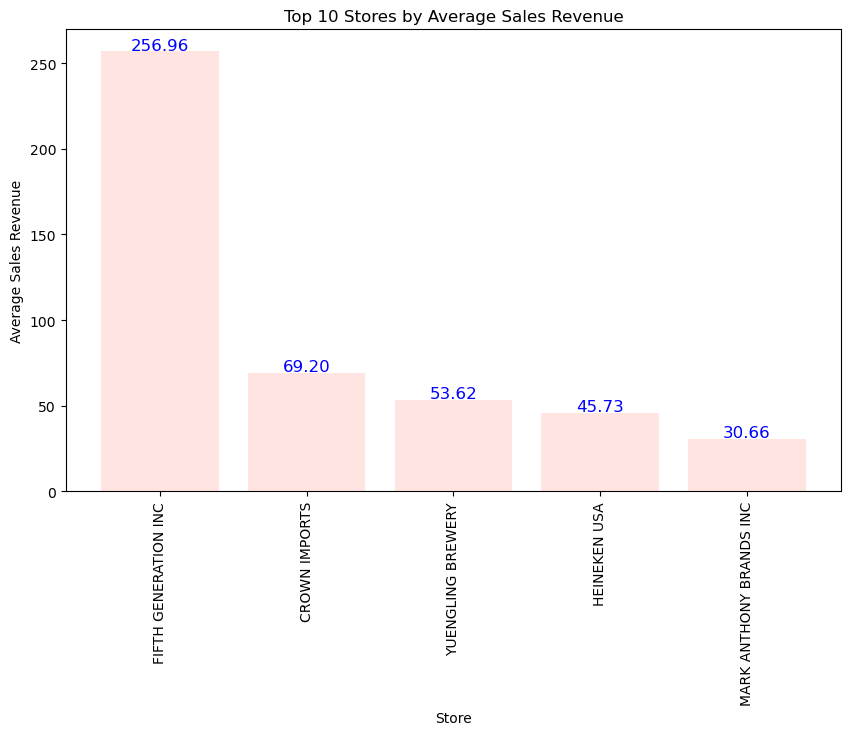

In [426]:
#Matplotlib
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)

plt.bar(y.index.values,y.values,color='#FFE4E1')

plt.title('Top 10 Stores by Average Sales Revenue')
plt.xlabel('Store')
plt.ylabel('Average Sales Revenue')

for i, value in enumerate(y.values):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=12, color='blue')
    
plt.show()

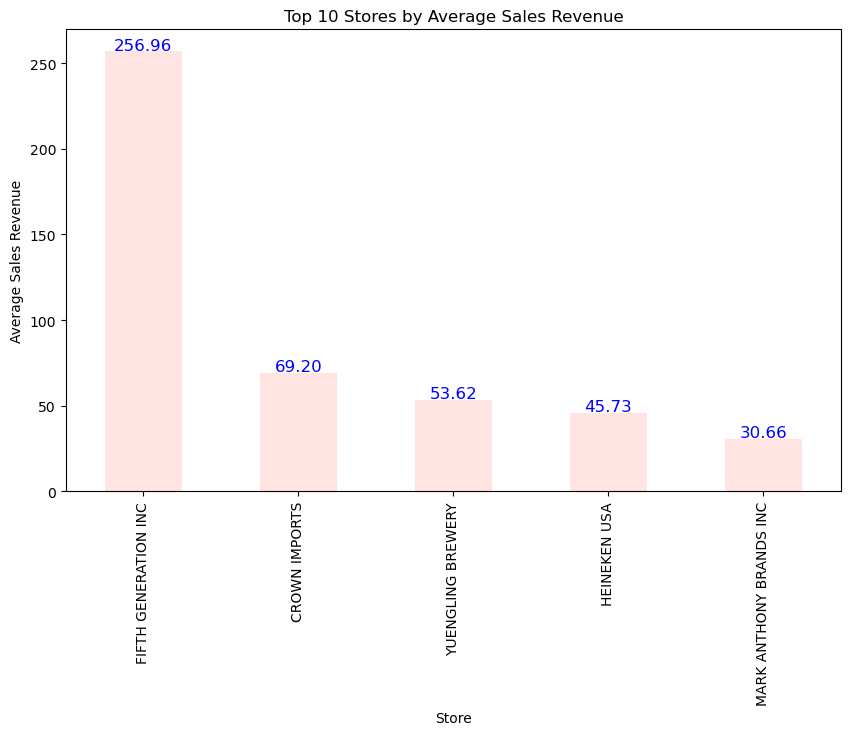

In [427]:
#using pandas ploting
plt.figure(figsize=(10,6))
y.plot(kind="bar",color='#FFE4E1')
plt.title('Top 10 Stores by Average Sales Revenue')
plt.xlabel('Store')
plt.ylabel('Average Sales Revenue')

for i, value in enumerate(y.values):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=12, color='blue')

plt.show()

# 13.What is the trend of total sales across the months and years?


#Convert YEAR and MONTH to a DATE column:
The pd.to_datetime function creates a valid date using the YEAR, MONTH,
and a fixed day (DAY=1) to represent the first day of each month.

In [428]:
df["DATE"]=pd.to_datetime(df[["YEAR","MONTH"]].assign(DAY=1)) #The .assign(DAY=1) adds a new column called DAY (with a default value of 1 for each row)
sales_trend=df.groupby("DATE")["RETAIL SALES"].sum()
sales_trend

DATE
2020-01-01    74318.770000
2020-03-01    34523.900000
2020-07-01    94545.899796
2020-09-01     4805.310000
Name: RETAIL SALES, dtype: float64

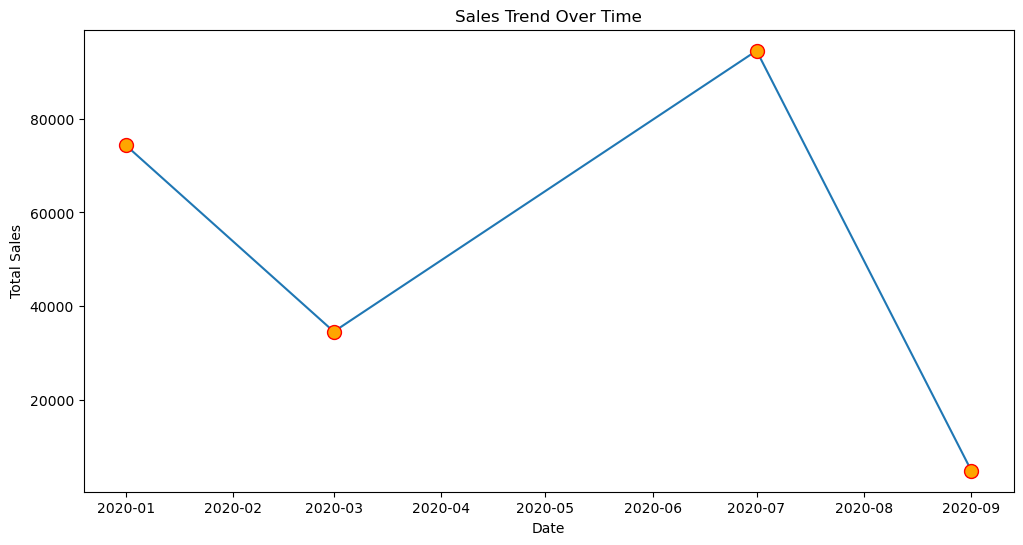

In [429]:
#Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index.values,sales_trend.values,marker="o",ms=10,mfc ="orange",mec="r")
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')

#for i, value in enumerate(sales_trend.values):
    #plt.text(x[i], value + 0.5,f'{value}', ha='center', fontsize=10, color='black')
    
plt.show()

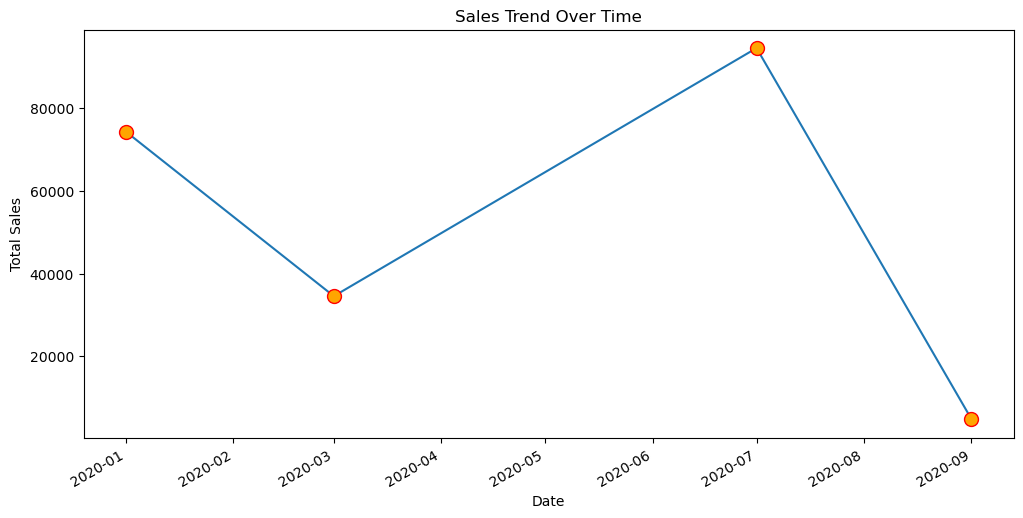

In [430]:
#Pandas
plt.figure(figsize=(12,6))
sales_trend.plot(marker="o",ms=10,mfc ="orange",mec="r")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")

#for i, value in enumerate(sales_trend.values):
    #plt.text(x[i], value+0.5,f'{value}', ha='center', fontsize=10, color='black')

plt.show()

# 14.How does marketing spend impact the sales revenue?


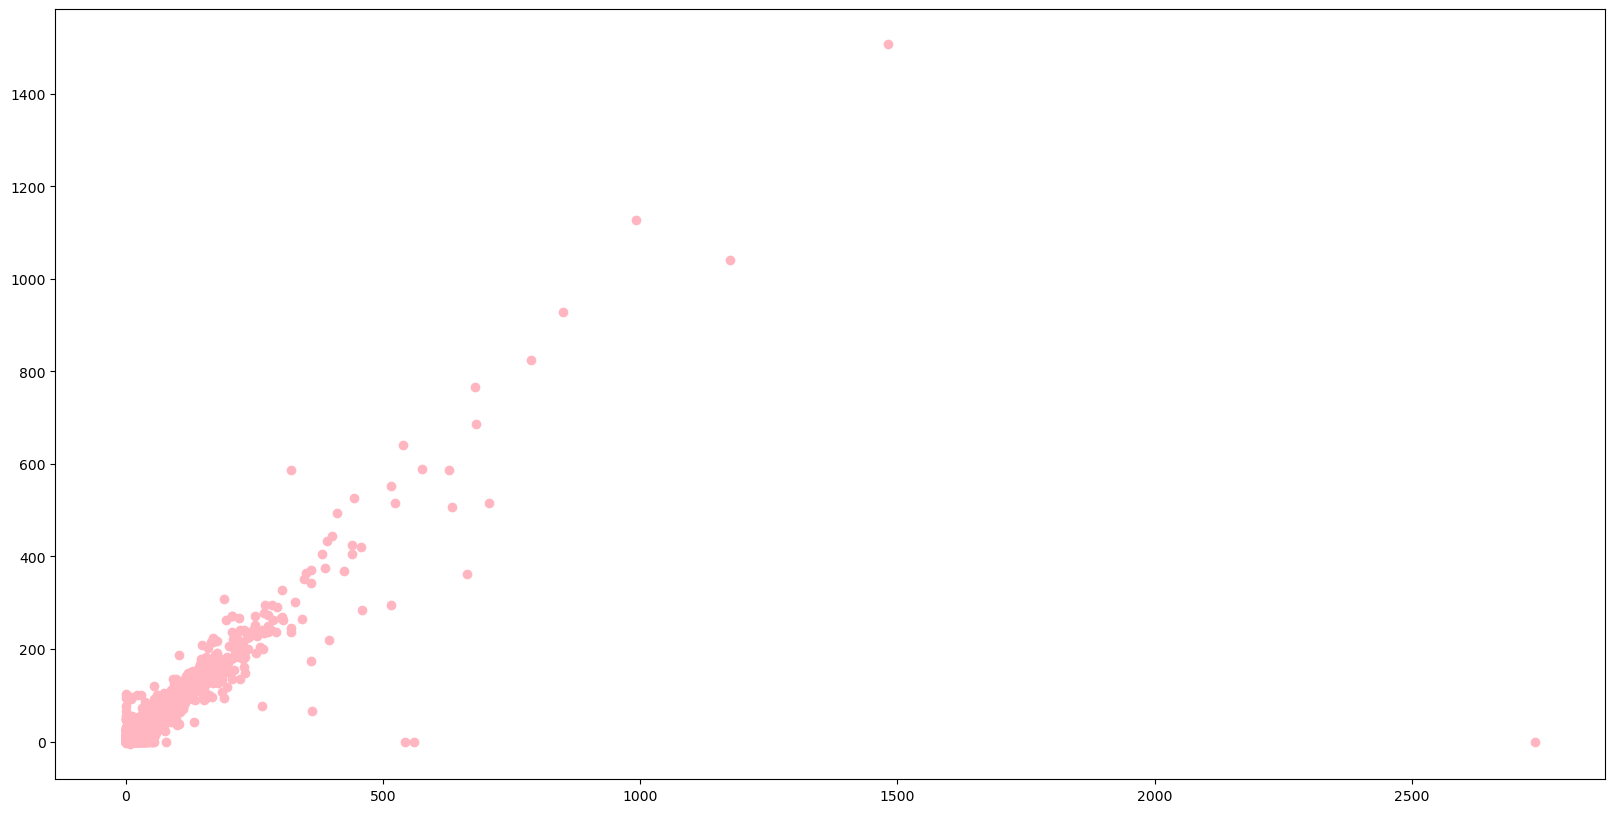

In [431]:
plt.figure(figsize=(20,10))
plt.scatter(df["RETAIL SALES"],df["RETAIL TRANSFERS"],color="#FFB6C1")

# 15.Which day of the week has the highest sales on average?


In [432]:
df["DAY_OF_WEEK"]=df["DATE"].dt.day_name()
day_sales = df.groupby("DAY_OF_WEEK")["RETAIL SALES"].mean()
day_sales

DAY_OF_WEEK
Sunday       6.025113
Tuesday      4.396441
Wednesday    7.285873
Name: RETAIL SALES, dtype: float64

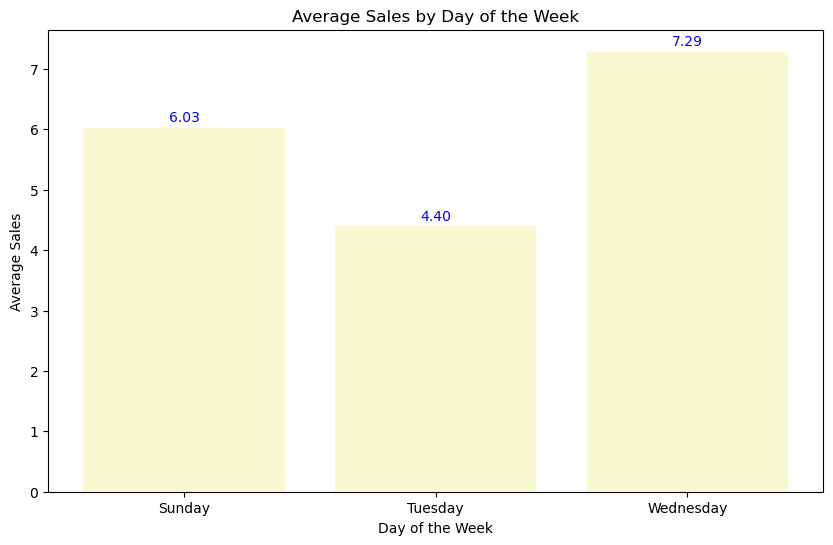

In [433]:
#Matplotlib
plt.figure(figsize=(10,6))
plt.bar(day_sales.index.values,day_sales.values,color='#FAFAD2')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')


for i, value in enumerate(day_sales.values):
    plt.text(i, value+0.1 ,f'{value:.2f}', ha='center', fontsize=10, color='blue')

# 16.What are the most popular product categories in terms of units sold?


In [434]:
popular_categories=df.groupby("ITEM TYPE")["RETAIL TRANSFERS"].sum()
popular_categories

ITEM TYPE
BEER            55729.83
DUNNAGE             0.00
KEGS                0.00
LIQUOR          79599.70
NON-ALCOHOL      2934.08
REF                34.00
STR_SUPPLIES      895.00
WINE            58629.13
Name: RETAIL TRANSFERS, dtype: float64

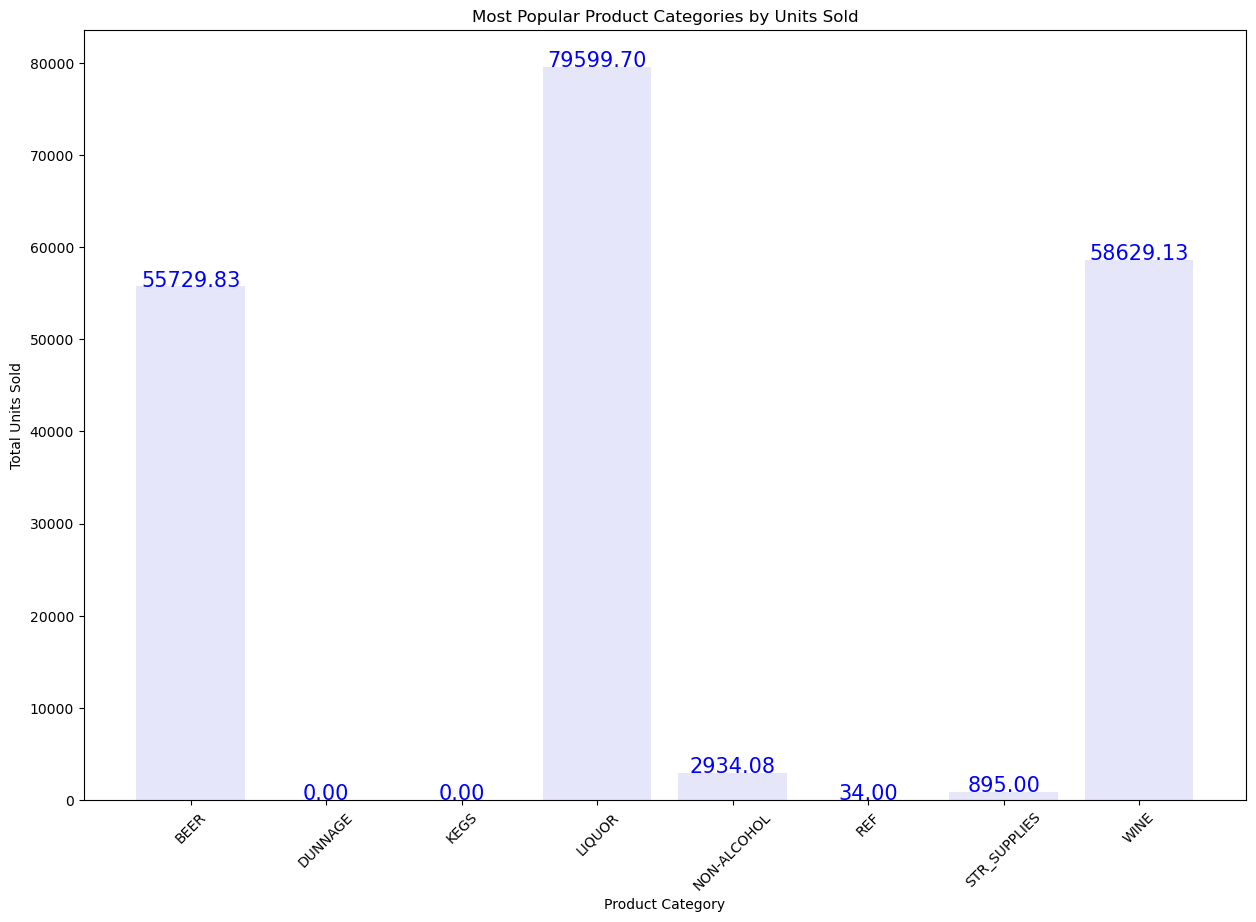

In [435]:
#matplotlib
plt.figure(figsize=(15,10))
plt.bar(popular_categories.index.values,popular_categories.values,color="#E6E6FA")
plt.title('Most Popular Product Categories by Units Sold')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)

for i, value in enumerate(popular_categories.values):
    plt.text(i, value+0.5 ,f'{value:.2f}', ha='center', fontsize=15, color='blue')

plt.show()

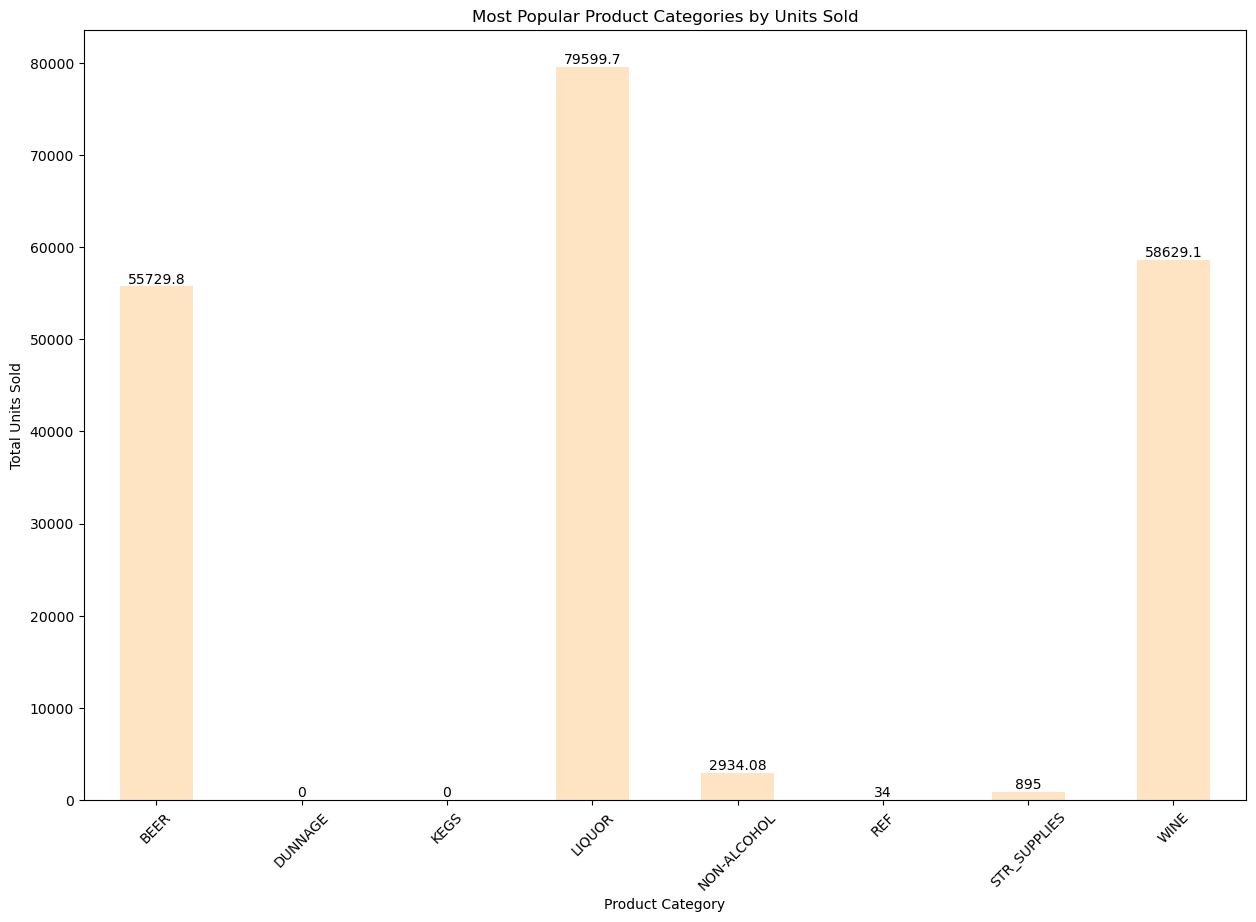

In [436]:
#pandas
plt.figure(figsize=(15, 10))
ax=popular_categories.plot(kind='bar',color=  "#FFE4C4")

# Customizing the plot
plt.title('Most Popular Product Categories by Units Sold')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

# 17.What is the average discount percentage applied to products?


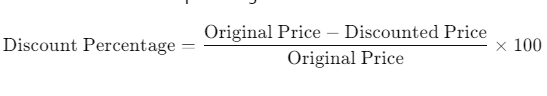

df['Discount Percentage'] = (df['Original Price'] - df['Discounted Price']) / df['Original Price'] * 100

# 18.What are the busiest times of the year for sales (e.g., holiday seasons)?


In [437]:
sales_trend=df.groupby("DATE")["RETAIL SALES"].sum()
sales_trend

DATE
2020-01-01    74318.770000
2020-03-01    34523.900000
2020-07-01    94545.899796
2020-09-01     4805.310000
Name: RETAIL SALES, dtype: float64

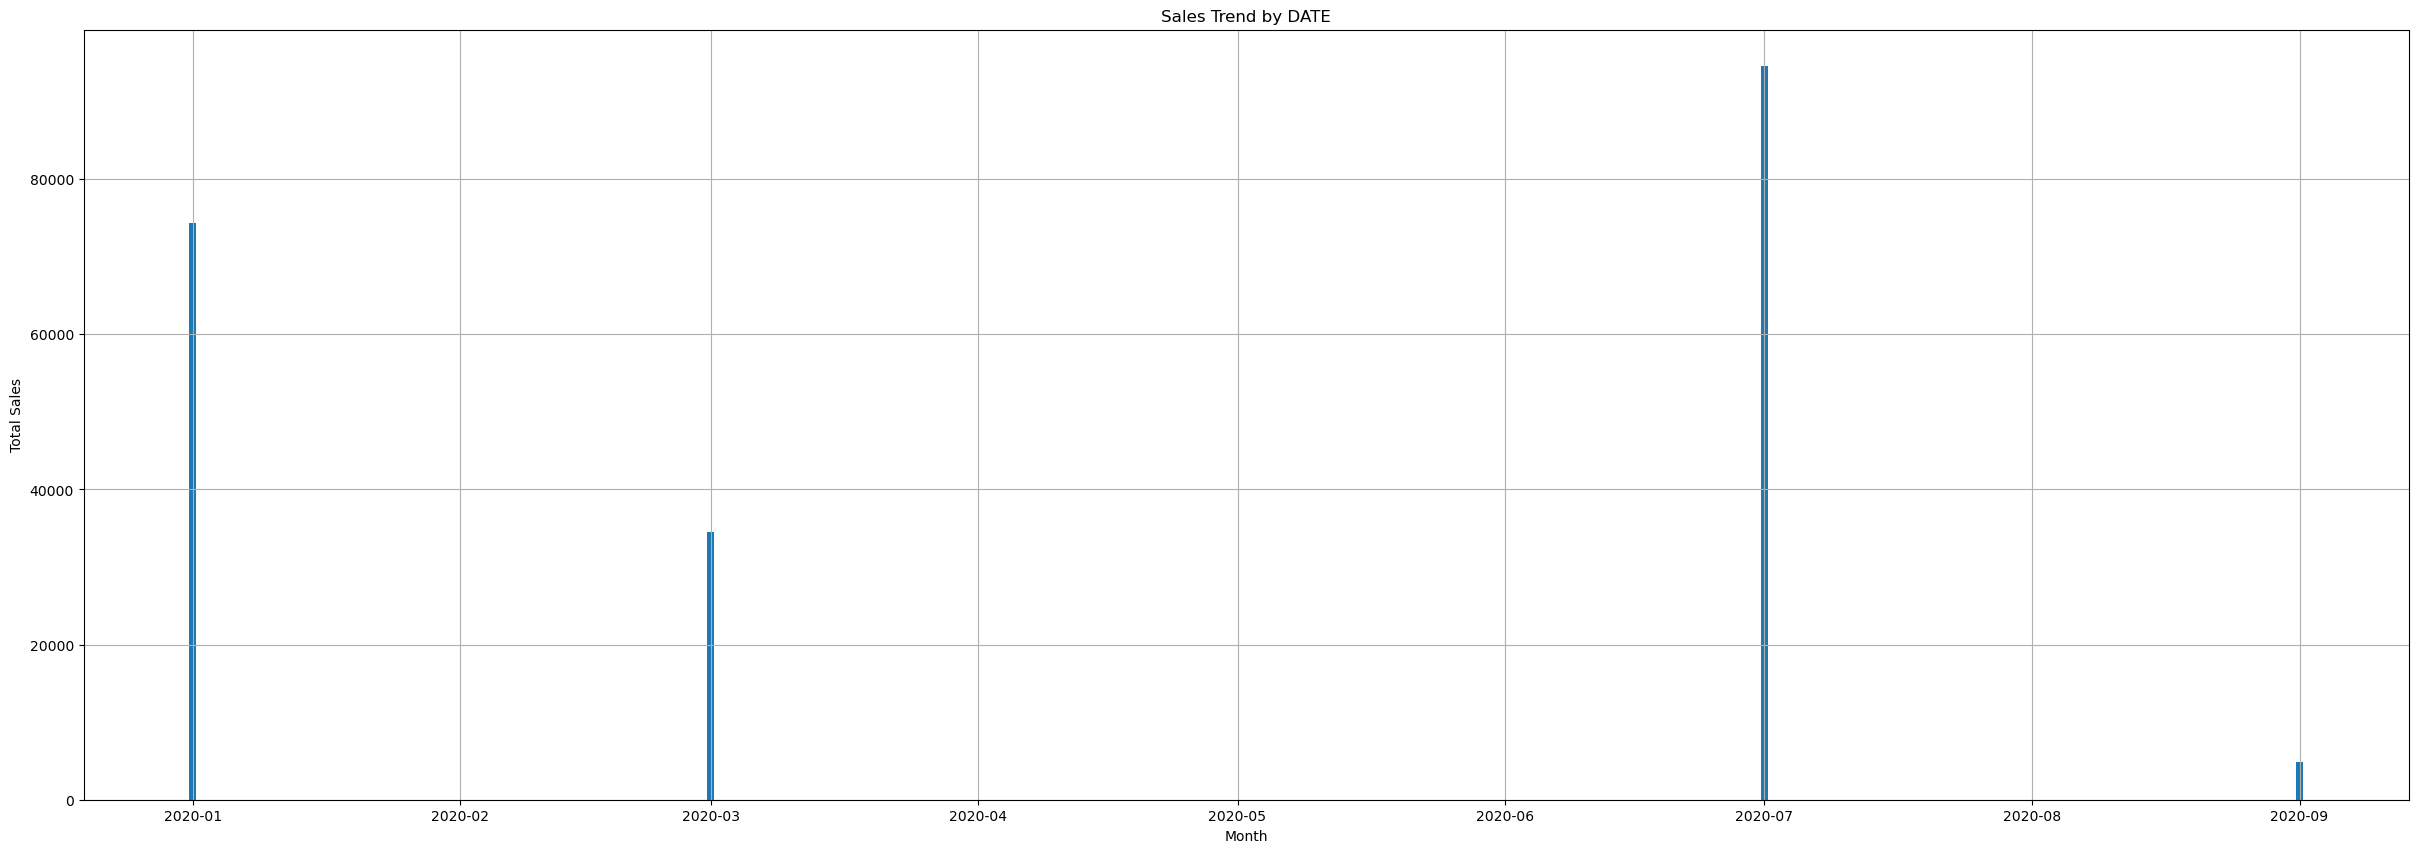

In [438]:
plt.figure(figsize=(30,10))
plt.bar(sales_trend.index.values,sales_trend.values)
plt.title('Sales Trend by DATE')
plt.xlabel('Month')
plt.ylabel('Total Sales')



plt.grid(True)
plt.show()

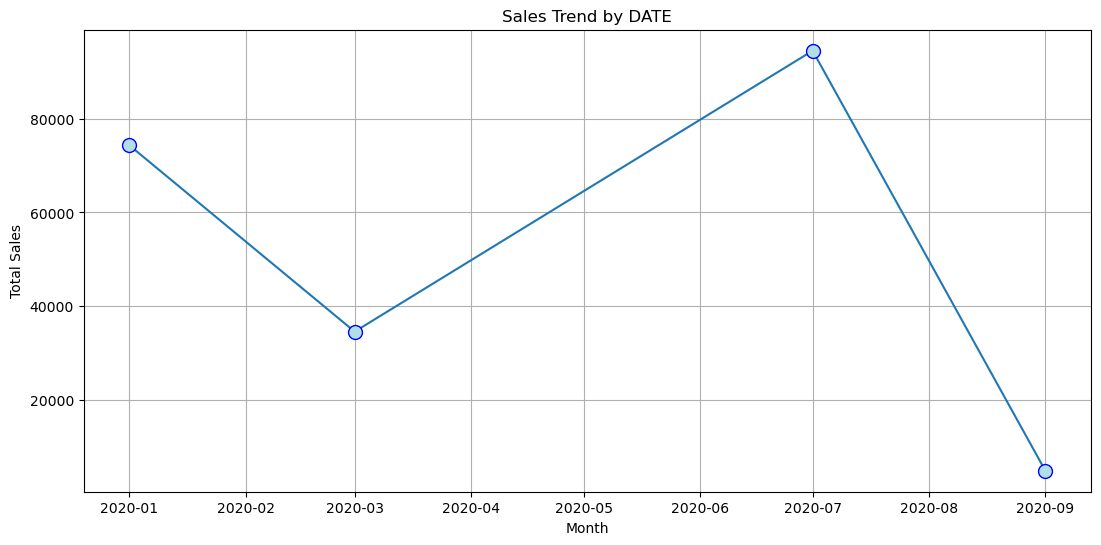

In [439]:
#Matplotlib
plt.figure(figsize=(13,6))
plt.plot(sales_trend.index.values,sales_trend.values,marker="o",ms=10,mfc ="#B0E0E6",mec="blue")
plt.title('Sales Trend by DATE')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.grid(True)
plt.show()

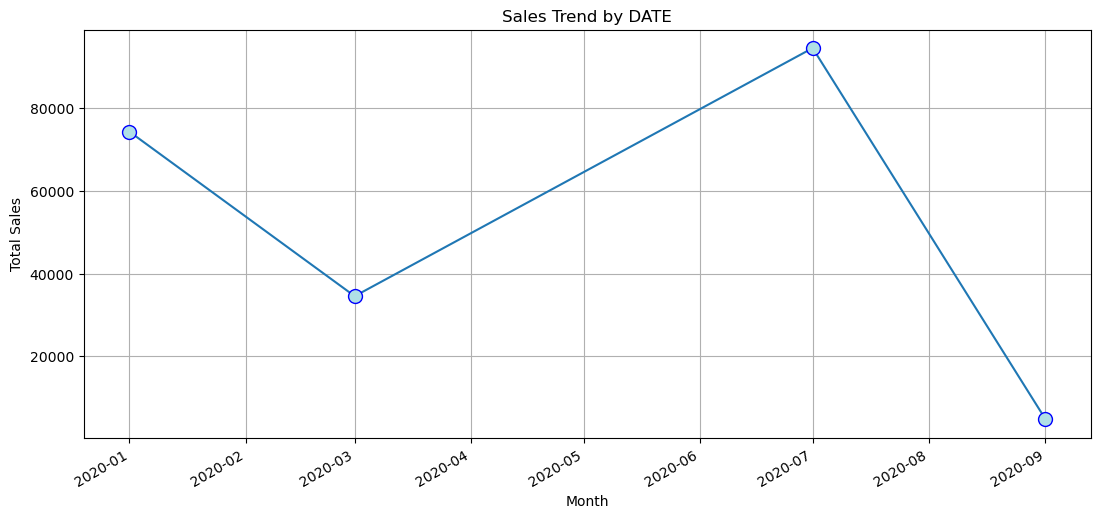

In [440]:
#Pandas
plt.figure(figsize=(13,6))
sales_trend.plot(marker="o",ms=10,mfc ="#B0E0E6",mec="blue")
plt.title('Sales Trend by DATE')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 19.	How does sales performance vary by store location?


In [441]:
sales_suppliers=df.groupby("SUPPLIER")["RETAIL SALES"].sum()
sales_suppliers

SUPPLIER
A I G WINE & SPIRITS             0.00
ADAMBA IMPORTS INTL              6.07
AIKO IMPORTERS INC               0.08
ALLAGASH BREWING COMPANY        61.65
ALLIED IMPORTERS USA LTD         0.00
                               ...   
WINERY EXCHANGE INC              0.08
YOUNG WON TRADING INC          507.32
YUENGLING BREWERY             2734.59
Z WINE GALLERY IMPORTS LLC       0.98
ZURENA LLC                       4.50
Name: RETAIL SALES, Length: 290, dtype: float64

Text(0.5, 1.0, 'Total sales by Suppliers')

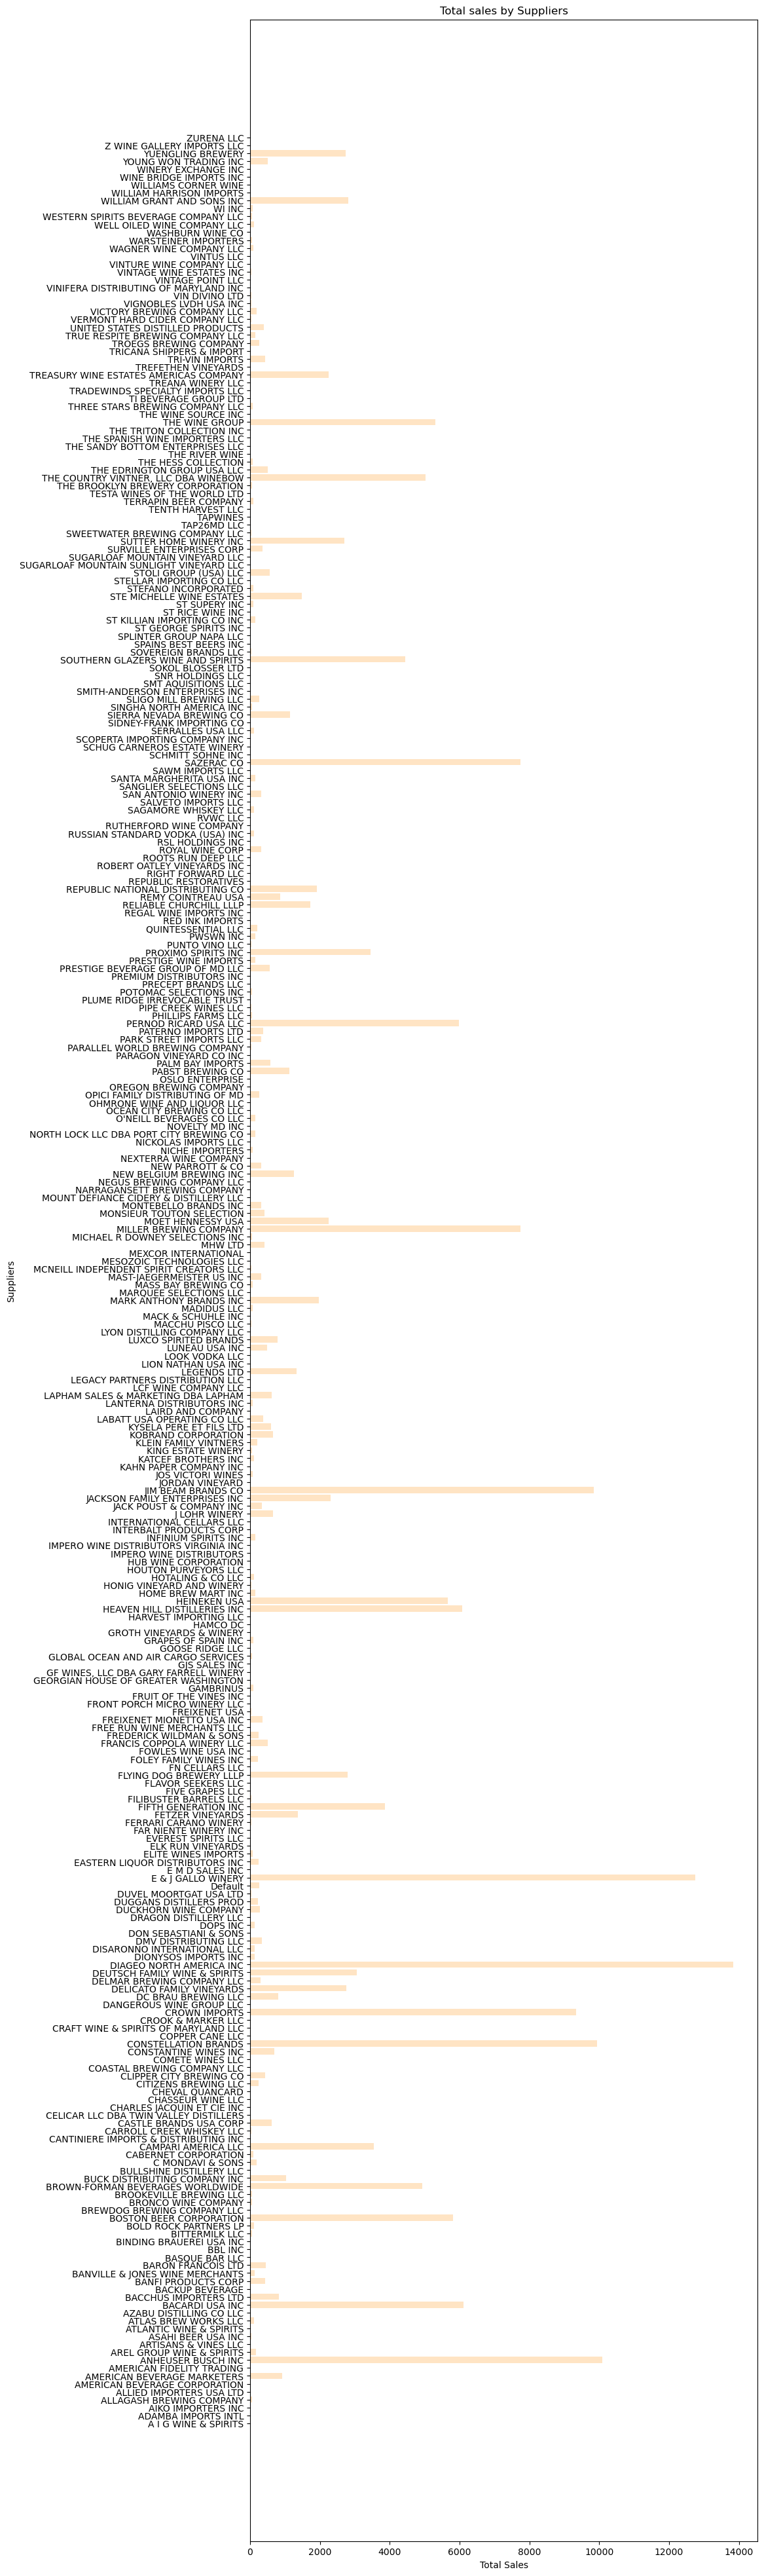

In [442]:
plt.figure(figsize=(10,50))
plt.barh(sales_suppliers.index.values,sales_suppliers.values,color="#FFE4C4")
plt.xlabel("Total Sales")
plt.ylabel("Suppliers")
plt.title("Total sales by Suppliers")


# 20.	How does the holiday effect impact sales compared to regular days?


In [443]:

day_sales = df.groupby("DAY_OF_WEEK")["RETAIL SALES"].mean()
day_sales

DAY_OF_WEEK
Sunday       6.025113
Tuesday      4.396441
Wednesday    7.285873
Name: RETAIL SALES, dtype: float64

Text(0, 0.5, 'Average Sales')

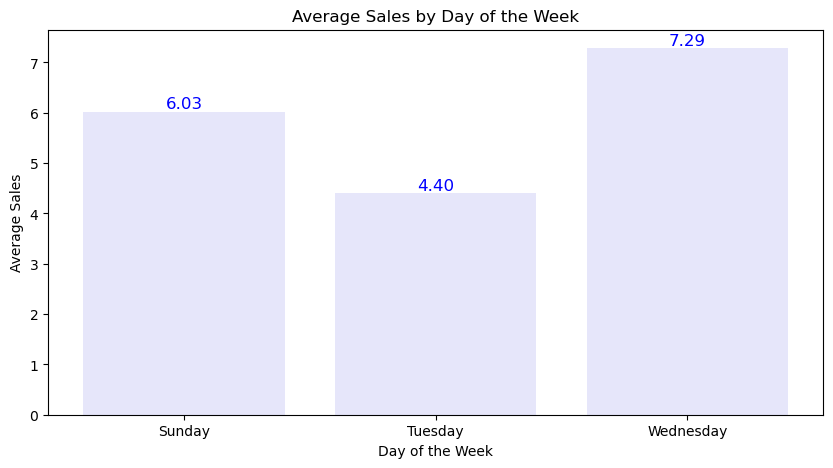

In [444]:
plt.figure(figsize=(10,5))
plt.bar(day_sales.index.values,day_sales.values,color="#E6E6FA")

for i, value in enumerate(day_sales.values):
    plt.text(i, value , f'{value:.2f}', ha='center',va="bottom", fontsize=12, color='blue')
    
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')

# For labeling 

**for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x()+bar.get_width()/2,yval/2,f'{value:.2f}', ha='center',va="bottom", fontsize=12, color='black')**

In [ ]:
for i, value in enumerate(day_sales.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=12, color='black')

In [ ]:
plt.text(i, value + 1, str(value), ha='center'):
    
i: The x-position of the label (centered on each bar).
    
value + 1: The y-position of the label (slightly above each bar, hence +1).
    
str(value): Converts the bar's value into a string to display as text.
    
ha='center': Horizontally aligns the text at the center of each bar.

In [ ]:
for i, value in enumerate(y):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=12, color='black')

In [ ]:
f'{value:.2f}': This is an f-string, where:
value: The number you want to format.
    
:.2f: Formats the number to 2 decimal places. You can change 2 to any other number for more or fewer decimal places.

# Matplotlib For Bar Data Labeling

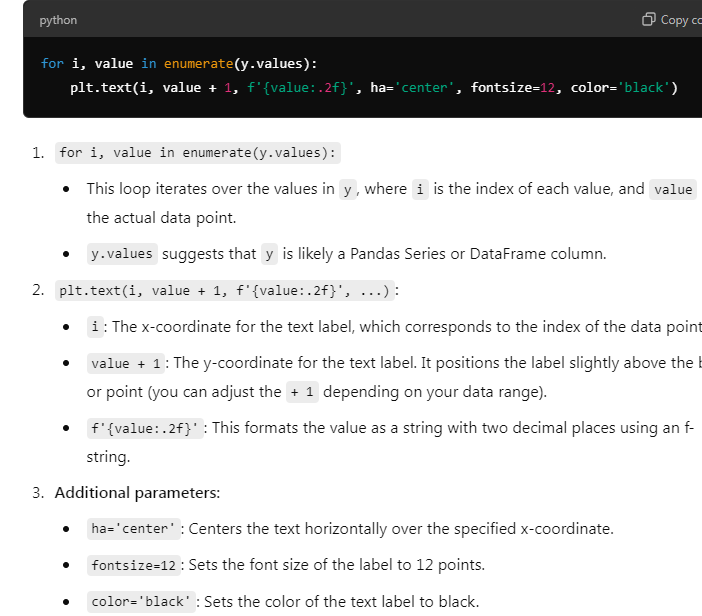

# Pandas  for Bar Data Labeling

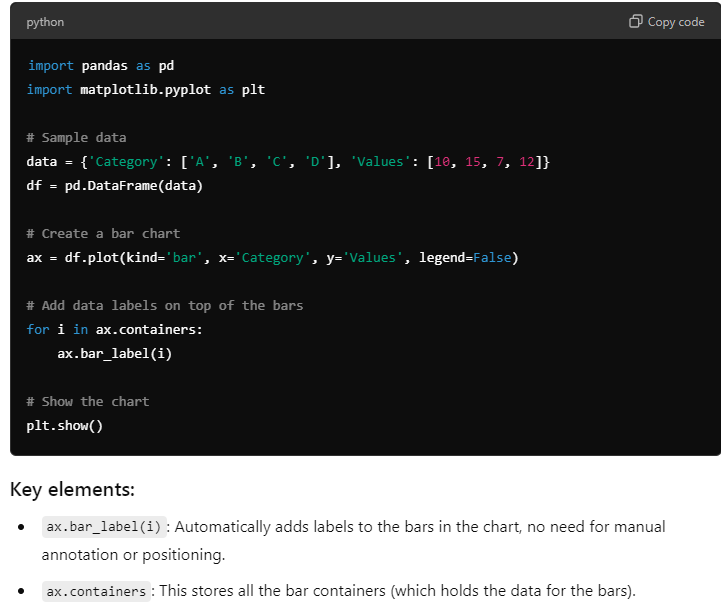